# Titanic Dataset - Predicción

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [3]:
from sklearn.metrics import accuracy_score

In [5]:
df_train= pd.read_csv("train.csv")
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
df_train = df_train.drop("PassengerId", axis=1)
df_train

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [7]:
df_train.shape

(891, 11)

In [10]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
df_train[['Pclass', 'Age', 'Fare',  'Survived']].groupby(['Pclass', 'Survived']).agg(['mean', 'std'])

Age                  Fare           
                      mean        std       mean        std
Pclass Survived                                            
1      0         43.695312  15.284243  64.684007  60.662089
       1         35.368197  13.760017  95.608029  85.286820
2      0         33.544444  12.151581  19.412328  15.307175
       1         25.901566  14.837787  22.055700  10.853502
3      0         26.555556  12.334882  13.669364  12.118338
       1         20.646118  11.995047  13.694887  10.692993

In [12]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 76.7+ KB


In [13]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

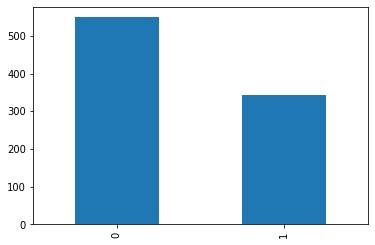

In [14]:
df_train.Survived.value_counts().plot(kind="bar")
plt.show()

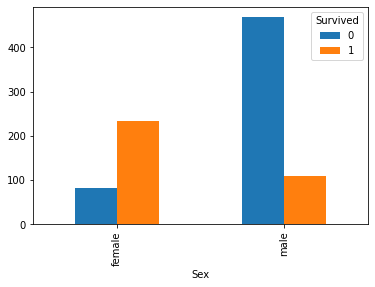

In [15]:
pd.crosstab(df_train.Sex, df_train.Survived).plot(kind="bar")
plt.show()

La mayoria de las mujeres sobreviven /
los hombres sobrevivieron muy pocos

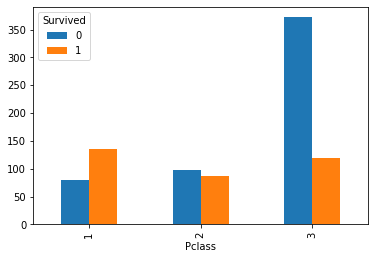

In [16]:
pd.crosstab(df_train.Pclass, df_train.Survived).plot(kind="bar")
plt.show()

La mayoria que no sobrevivio era de Tercera clase.....

In [17]:
df_train.shape

(891, 11)

In [18]:
df_train.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [19]:
# y aqui vemos cuantas columnas tiene valores que faltan
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [32]:
nan_data = df_train.isnull().sum() / len(df_train) * 100
nan_data

Survived     0.000000
Pclass       0.000000
Name         0.000000
Sex          0.000000
Age         19.865320
SibSp        0.000000
Parch        0.000000
Ticket       0.000000
Fare         0.000000
Cabin       77.104377
Embarked     0.224467
dtype: float64

Conclusiones: Existen columnas de "missing values" (Valores que faltan)

In [33]:
df_train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [34]:
for cabina in df_train.Cabin:
    print(cabina)

nan
C85
nan
C123
nan
nan
E46
nan
nan
nan
G6
C103
nan
nan
nan
nan
nan
nan
nan
nan
nan
D56
nan
A6
nan
nan
nan
C23 C25 C27
nan
nan
nan
B78
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
D33
nan
B30
C52
nan
nan
nan
nan
nan
B28
C83
nan
nan
nan
F33
nan
nan
nan
nan
nan
nan
nan
nan
F G73
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
C23 C25 C27
nan
nan
nan
E31
nan
nan
nan
A5
D10 D12
nan
nan
nan
nan
D26
nan
nan
nan
nan
nan
nan
nan
C110
nan
nan
nan
nan
nan
nan
nan
B58 B60
nan
nan
nan
nan
E101
D26
nan
nan
nan
F E69
nan
nan
nan
nan
nan
nan
nan
D47
C123
nan
B86
nan
nan
nan
nan
nan
nan
nan
nan
F2
nan
nan
C2
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
E33
nan
nan
nan
B19
nan
nan
nan
A7
nan
nan
C49
nan
nan
nan
nan
nan
F4
nan
A32
nan
nan
nan
nan
nan
nan
nan
F2
B4
B80
nan
nan
nan
nan
nan
nan
nan
nan
nan
G6
nan
nan
nan
A31
nan
nan
nan
nan
nan
D36
nan
nan
D15
nan
nan
nan
nan
nan
C93
nan
nan
nan
nan
nan
C83
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
n

In [35]:
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [36]:
pd.crosstab(df_train.Sex, df_train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


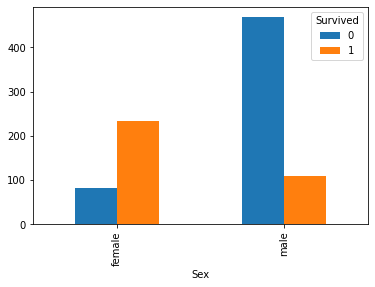

In [37]:
pd.crosstab(df_train.Sex, df_train.Survived).plot(kind="bar")
plt.show()

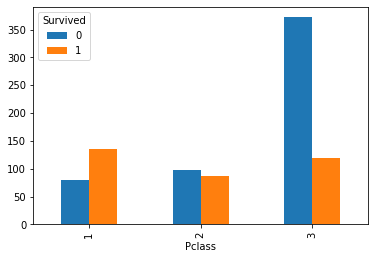

In [38]:
pd.crosstab(df_train.Pclass, df_train.Survived).plot(kind="bar")
plt.show()

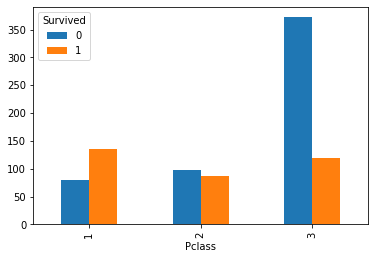

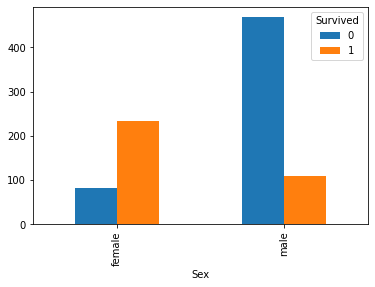

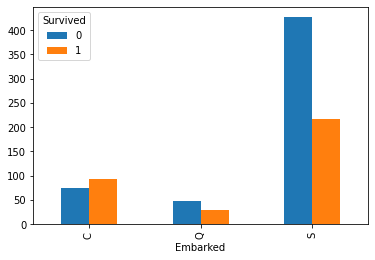

In [39]:
opciones = ["Pclass", "Sex", "Embarked"]
for opcion in opciones:
    pd.crosstab(df_train[opcion], df_train.Survived).plot(kind="bar")
    plt.show()

Sobrevivieron la mayoria de las mujeres,  fallecieron sobre todo las de Tercera
clase que embarcaron en "S", aun asi sobrevivieron mas que los hombres que embarcaron
en el msmo puerto.
Los hombres con mayor porcentaje de supervivencia embarcaron en "C" y con menor porcentaje de supervivencia en "Q".

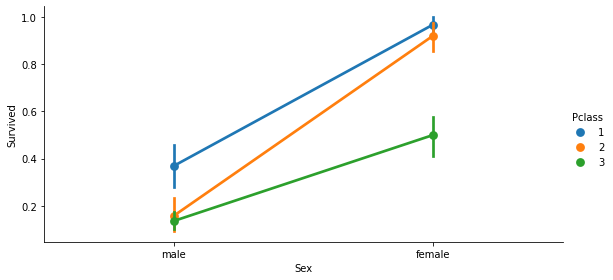

In [40]:
sns.catplot(x="Sex", y="Survived", hue="Pclass", kind="point", height=4, aspect=2, data=df_train)
plt.show()

In [41]:
#Vemos por edades

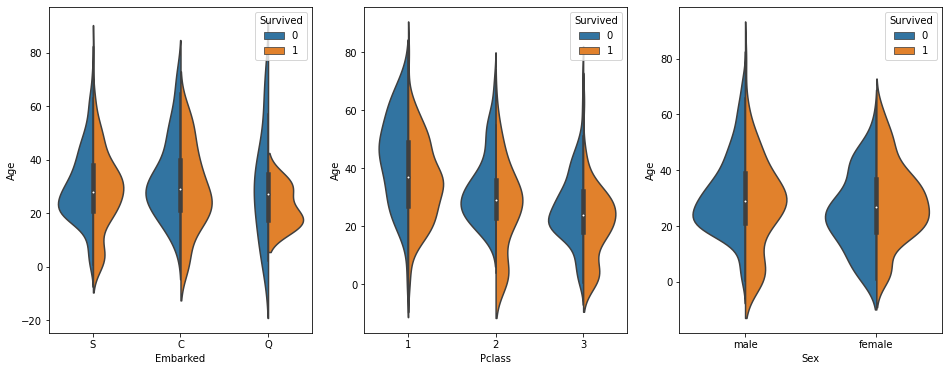

In [42]:
# me creo una figura
fig = plt.figure(figsize=(16,6))
# 3 subplots
# 1 fila 3 columnas - gráfica 1
ax1 = fig.add_subplot(131)
# 1 fila 3 columnas - gráfica 2
ax2 = fig.add_subplot(132)
# 1 fila 3 columnas - gráfica 3
ax3 = fig.add_subplot(133)
# violinplot
sns.violinplot(x="Embarked", y="Age", hue="Survived", data=df_train, split=True, ax=ax1)
sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df_train, split=True, ax=ax2)
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df_train, split=True, ax=ax3)
plt.show()

/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_27034/2852807498.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Age'], kde=False, fit=stats.norm)


<AxesSubplot:xlabel='Age'>

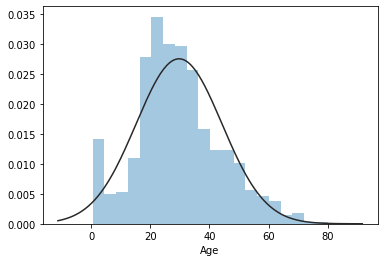

In [43]:
import scipy.stats as stats
sns.distplot(df_train['Age'], kde=False, fit=stats.norm)

La gente de 18-35 sobrevivieron la mayoria, del a 2 y 3 clase sobrevivieron
la mayoria de los niños. los jovenes menores de 20 sobrevivieron pero no las mujeres.

In [44]:
corrmat=df_train.corr('spearman')
print(corrmat)

          Survived    Pclass       Age     SibSp     Parch      Fare
Survived  1.000000 -0.339668 -0.052565  0.088879  0.138266  0.323736
Pclass   -0.339668  1.000000 -0.361666 -0.043019 -0.022801 -0.688032
Age      -0.052565 -0.361666  1.000000 -0.182061 -0.254212  0.135051
SibSp     0.088879 -0.043019 -0.182061  1.000000  0.450014  0.447113
Parch     0.138266 -0.022801 -0.254212  0.450014  1.000000  0.410074
Fare      0.323736 -0.688032  0.135051  0.447113  0.410074  1.000000


/var/folders/jw/lg6ll5ln5sx8l3dbpj7412480000gn/T/ipykernel_27034/701452003.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat=df_train.corr('spearman')


#Aqui vemos la correlacion entre las diferentes columnas

# Feature Engineering

In [45]:
df_train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [46]:
df_train.isnull().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [47]:
df_train.Age.isnull().sum()

177

In [48]:
df_train.Age = df_train.Age.fillna(df_train.Age.mean())

In [49]:
df_train.Age.isnull().sum()

0

In [50]:
df_train=df_train.drop(columns=['Name', 'Ticket', 'Cabin'])

In [51]:
df_train


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.000000,1,0,7.2500,S
1,1,1,female,38.000000,1,0,71.2833,C
2,1,3,female,26.000000,0,0,7.9250,S
3,1,1,female,35.000000,1,0,53.1000,S
4,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,13.0000,S
887,1,1,female,19.000000,0,0,30.0000,S
888,0,3,female,29.699118,1,2,23.4500,S
889,1,1,male,26.000000,0,0,30.0000,C


Datos categoricos: Sexo, embarque con tres opciones y pClass con tres opciones tambien;
    
    

In [52]:
df_train = pd.get_dummies(df_train, columns=["Sex", "Pclass", "Embarked"], drop_first=True)
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,1,0,1,0,1


Escalado de los datos, solo de edad y tarifa

In [53]:
df_train.Age = (df_train.Age - np.mean(df_train.Age, axis=0)) / (np.std(df_train.Age, axis=0))
df_train.Fare = (df_train.Fare - np.mean(df_train.Fare, axis=0)) / (np.std(df_train.Fare, axis=0))
df_train.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0,-0.592481,1,0,-0.502445,1,0,1,0,1
1,1,0.638789,1,0,0.786845,0,0,0,0,0
2,1,-0.284663,0,0,-0.488854,0,0,1,0,1
3,1,0.407926,1,0,0.420730,0,0,0,0,1
4,0,0.407926,0,0,-0.486337,1,0,1,0,1


# X Y

In [54]:
X = df_train.drop("Survived", axis=1)
X.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,-0.592481,1,0,-0.502445,1,0,1,0,1
1,0.638789,1,0,0.786845,0,0,0,0,0
2,-0.284663,0,0,-0.488854,0,0,1,0,1
3,0.407926,1,0,0.420730,0,0,0,0,1
4,0.407926,0,0,-0.486337,1,0,1,0,1


In [55]:
y = df_train["Survived"]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [57]:
X_train.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
331,1.215947,0,0,-0.074583,1,0,0,0,1
733,-0.515526,0,0,-0.386671,1,1,0,0,1
382,0.177063,0,0,-0.488854,1,0,1,0,1
704,-0.284663,1,0,-0.490280,1,0,1,0,1
813,-1.823750,4,2,-0.018709,0,0,1,0,1


In [58]:
X_test.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
709,0.000000,1,1,-0.341452,1,0,1,0,0
439,0.100109,0,0,-0.437007,1,1,0,0,1
840,-0.746389,0,0,-0.488854,1,0,1,0,1
720,-1.823750,0,1,0.016023,0,1,0,0,1
39,-1.208115,1,0,-0.422074,0,0,1,0,0


In [59]:
y_train.head()

331    0
733    0
382    0
704    0
813    0
Name: Survived, dtype: int64

In [60]:
y_test.head()

709    1
439    0
840    0
720    1
39     1
Name: Survived, dtype: int64

Pruebo los posibles algoritmos a ensayar

In [61]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_KN = accuracy_score(y_test, y_pred)
acc_KN

0.8212290502793296

In [62]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_DT = accuracy_score(y_test, y_pred)
acc_DT

0.7932960893854749

In [63]:
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_RF = accuracy_score(y_test, y_pred)
acc_RF

0.8100558659217877

In [64]:
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_NB = accuracy_score(y_test, y_pred)
acc_NB

0.7653631284916201

In [65]:
clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_SVC = accuracy_score(y_test, y_pred)
acc_SVC

0.8156424581005587

El que mejor predice

In [66]:
clf = KNeighborsClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_KN = accuracy_score(y_test, y_pred)
acc_KN

0.8212290502793296

In [67]:
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
acc_algoritmo = accuracy_score(y_test, y_pred)
acc_algoritmo

0.8044692737430168

In [68]:
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [69]:
df_train = pd.read_csv("train.csv")
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [71]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [72]:
test.Age = test.Age.fillna(test.Age.mean())
test.Fare = test.Fare.fillna(test.Fare.mean())

In [73]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [74]:
test = test.drop(["Name", "Ticket", "Cabin"], axis=1)
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [75]:
test = pd.get_dummies(test, columns=["Sex", "Pclass", "Embarked"], drop_first=True)
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,34.5,0,0,7.8292,1,0,1,1,0
1,893,47.0,1,0,7.0000,0,0,1,0,1
2,894,62.0,0,0,9.6875,1,1,0,1,0
3,895,27.0,0,0,8.6625,1,0,1,0,1
4,896,22.0,1,1,12.2875,0,0,1,0,1


In [76]:
test.Age = (test.Age - np.mean(test.Age, axis=0)) / (np.std(test.Age, axis=0))
test.Fare = (test.Fare - np.mean(test.Fare, axis=0)) / (np.std(test.Fare, axis=0))
test.head()

,PassengerId,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,892,0.334993,0,0,-0.498407,1,0,1,1,0
1,893,1.325530,1,0,-0.513274,0,0,1,0,1
2,894,2.514175,0,0,-0.465088,1,1,0,1,0
3,895,-0.259330,0,0,-0.483466,1,0,1,0,1
4,896,-0.655545,1,1,-0.418471,0,0,1,0,1


In [77]:
test = test.drop("PassengerId", axis=1)
test.head()

,Age,SibSp,Parch,Fare,Sex_male,Pclass_2,Pclass_3,Embarked_Q,Embarked_S
0,0.334993,0,0,-0.498407,1,0,1,1,0
1,1.325530,1,0,-0.513274,0,0,1,0,1
2,2.514175,0,0,-0.465088,1,1,0,1,0
3,-0.259330,0,0,-0.483466,1,0,1,0,1
4,-0.655545,1,1,-0.418471,0,0,1,0,1


In [78]:
y_pred = clf.predict(test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [79]:
df_submision = pd.read_csv("gender_submission.csv")
df_submision

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [80]:
df_submision["Survived"] = y_pred
df_submision.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [81]:
df_submision.to_csv("gender_submission_Final.csv", index=False)